Can you count something interesting? 
- which months were the most or the least available (can make bar graph & scatter plot)
- which neighborhoods were the most popular
- which of those neighborhoods recieved a higher overall rating by 

Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

Can you make a bar plot or a histogram?

Can you compare two related quantities?

Can you make a scatterplot?

Can you make a time-series plot?

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [62]:
seattle = pd.read_csv("/Users/karinahou/Desktop/Data Science Bootcamp/Seattle DF Cleaned.csv")
calendar = pd.read_csv("/Users/karinahou/Desktop/Data Science Bootcamp/Calendar Cleaned.csv")

In [63]:
#looking for most popular neighborhoods
sorted_neigh = seattle["neighbourhood"].sort_values()
sorted_neigh.head()

431     Adams
5097    Adams
3084    Adams
688     Adams
1595    Adams
Name: neighbourhood, dtype: object

In [64]:
neigh_counted = sorted_neigh.value_counts()

neigh_counted = neigh_counted.rename_axis("neighbourhoods").reset_index(name= "count")
neigh_counted_top10 = neigh_counted.head(10)

Most popular neighborhood year-round was downtown exclusing "other"

Text(0.5, 1.0, '10 Most Popular Neighborhoods by Bookings')

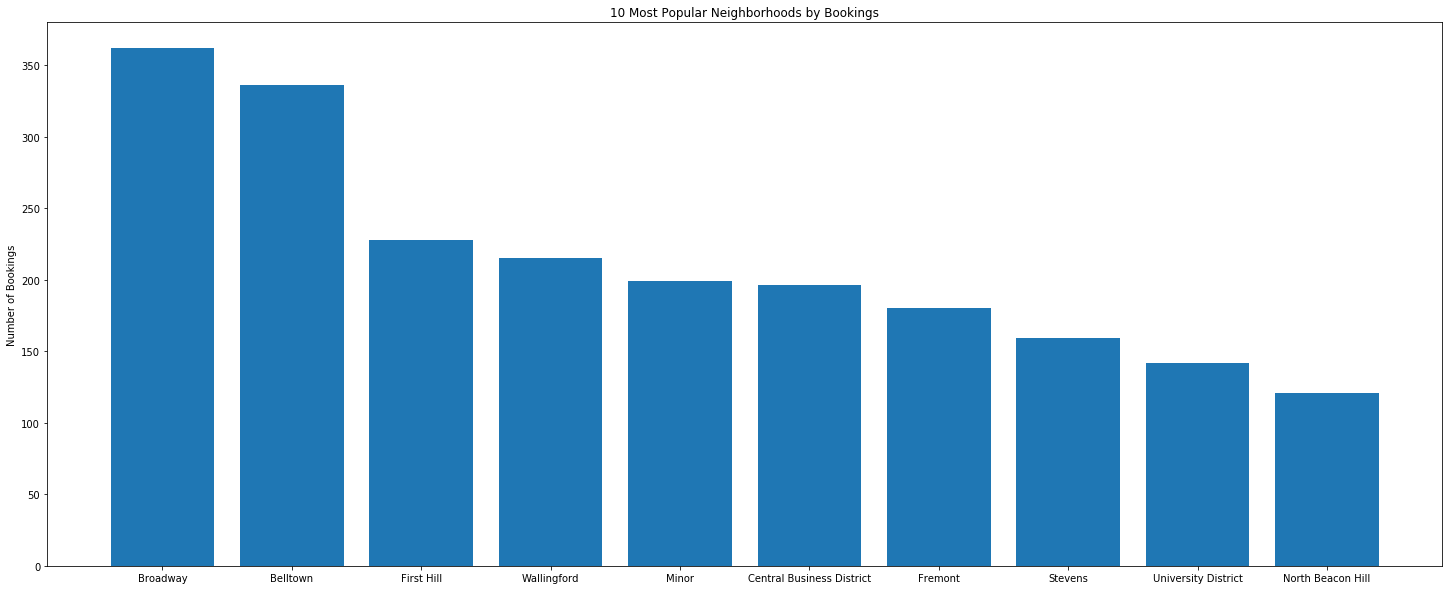

In [65]:
x = list(neigh_counted_top10["neighbourhoods"])
y = list(neigh_counted_top10["count"])
plt.figure(figsize=(25, 10)) 
plt.bar(x,y)
plt.ylabel("Number of Bookings")
plt.title("10 Most Popular Neighborhoods by Bookings")

#how to just take the first couple?

In [66]:
#looking for most popular month of the year

In [67]:
calendar_unavail = calendar[calendar["available"] == "f"].index
calendar_avail = calendar.drop(calendar_unavail)
calendar_avail.head()

,Unnamed: 0,listing_id,date,available,price,month
0,0,241032,2016-01-04,t,$85.00,January
1,1,241032,2016-01-05,t,$85.00,January
9,9,241032,2016-01-13,t,$85.00,January
10,10,241032,2016-01-14,t,$85.00,January
14,14,241032,2016-01-18,t,$85.00,January


In [68]:
calendar_avail.dtypes

Unnamed: 0     int64
listing_id     int64
date          object
available     object
price         object
month         object
dtype: object

In [69]:
#trying to make a date time series plot :(
#calendar_avail["date"] = pd.to_datetime(calendar_avail["date"])
#calendar_avail.dtypes

In [70]:
'''
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('month', 'date', data = calendar_avail, color='tab:red')

# Decoration
plt.ylim(50, 750)
xtick_location = calendar_avail.index.tolist()[::12]
xtick_labels = [x[-4:] for x in calendar_avail.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, 
           horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=.3)
'''

'\n# Draw Plot\nplt.figure(figsize=(16,10), dpi= 80)\nplt.plot(\'month\', \'date\', data = calendar_avail, color=\'tab:red\')\n\n# Decoration\nplt.ylim(50, 750)\nxtick_location = calendar_avail.index.tolist()[::12]\nxtick_labels = [x[-4:] for x in calendar_avail.date.tolist()[::12]]\nplt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, \n           horizontalalignment=\'center\', alpha=.7)\nplt.yticks(fontsize=12, alpha=.7)\nplt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)\nplt.grid(axis=\'both\', alpha=.3)\n'

In [71]:
sorted_month_col = calendar_avail["month"].sort_values()
sorted_month_col.head()

919160     April
1237078    April
814768     April
814769     April
814770     April
Name: month, dtype: object

In [72]:
month_counted = sorted_month_col.value_counts()

month_counted = month_counted.rename_axis("month").reset_index(name= "count")
month_counted

,month,count
0,December,87061
1,March,83938
2,October,82438
3,November,81780
4,May,79971
5,September,77246
6,June,77244
7,August,76347
8,April,76037
9,July,74222


Text(0, 0.5, 'Number of Bookings')

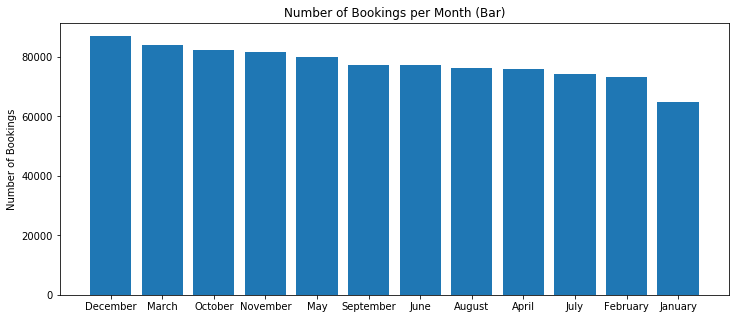

In [73]:
x = list(month_counted["month"])
y = list(month_counted["count"])
plt.figure(figsize=(12, 5)) 
plt.bar(x,y)
plt.title("Number of Bookings per Month (Bar)")
plt.ylabel("Number of Bookings")

#could divide

In [74]:
#linechart with labels of values

#boxplot: day of the month number of bookings, distribution of box plot

#to plot the differences between the month # of bookings

Most popular month was December

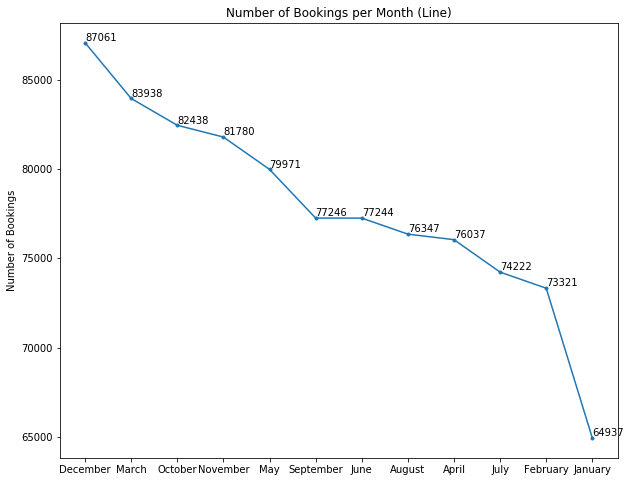

In [85]:
#plot as line chart

plt.figure(figsize=(10, 8)) 
plt.plot(x,y, marker = ".")
plt.ylabel("Number of Bookings")
plt.title("Number of Bookings per Month (Line)")

for a,b in zip(x,y):

    label = "{:.0f}".format(b)

    plt.annotate(label, # this is the text
                 (a,b), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

Text(0.5, 0, 'Bookings')

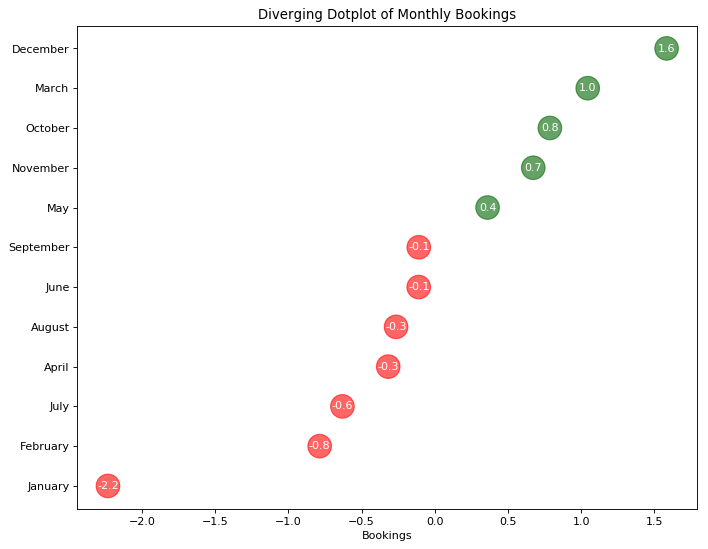

In [76]:
#Making a Divering Dot Plot that contrasts the number of bookings per month

month_x = month_counted.loc[:, ["count"]]
month_counted["mpg_z"] = (month_x - month_x.mean())/month_x.std()
month_counted["color"] = ["red" if month_x < 0 else "darkgreen" for month_x in month_counted["mpg_z"]]
month_counted.sort_values("mpg_z", inplace = True)
month_counted.reset_index(inplace = True)

plt.figure(figsize = (10,8), dpi = 80)
plt.scatter(month_counted.mpg_z, month_counted.index, s = 450, alpha = 0.6, color = month_counted.color)

for xm, ym, tex in zip(month_counted.mpg_z, month_counted.index, month_counted.mpg_z):
    t = plt.text(xm, ym, round(tex, 1), horizontalalignment = "center", verticalalignment = "center",
                fontdict = {"color":"white"})

plt.title("Diverging Dotplot of Monthly Bookings")
plt.yticks(month_counted.index, month_counted.month)

plt.xlabel("Bookings")

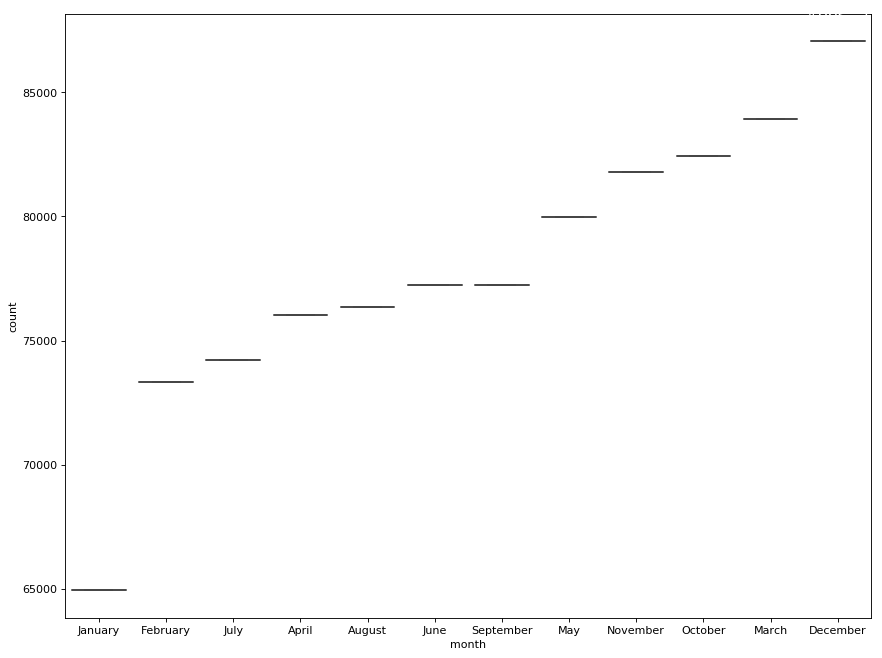

In [77]:
#boxplot per month - have the day of the month that they were booked.  (called "counts plot")

plt.figure(figsize = (13,10), dpi = 80)
sns.boxplot(x = "month", y = "count", data = month_counted, notch = False)

def add_n_obs(df, group_col, y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = month_counted.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment = "center",
                fontdict = {"size":14}, color = "white")
    
add_n_obs(month_counted, group_col = "month", y = "count")

#o she wanted every day? need a new dataframe for this one HAHA POOR THINGS ARE JUST SLIVERS

In [78]:
#which neighborhoods had the highest ratings?

In [79]:
satis_zero = seattle[seattle["overall_satisfaction"] == 0.0].index
seattle_no_zero_satis = seattle.drop(satis_zero)
neighborhood_reviews = seattle_no_zero_satis.filter(['overall_satisfaction','neighbourhood'], axis=1)
neighborhood_reviews.head()

,overall_satisfaction,neighbourhood
0,5.0,Madrona
1,5.0,South Delridge
2,4.5,Wallingford
3,4.5,Georgetown
4,5.0,First Hill


In [80]:
#how to get the mean value of each neighborhood? excluding 0 values?
#group by neighborhood and mean of overall satisfaction
#drop the null rows in data cleaning

In [81]:
neigh_satisfaction = neighborhood_reviews.groupby("neighbourhood").mean().reset_index()
top_neighborhoods = neigh_satisfaction.sort_values("overall_satisfaction", ascending = False).head(10)
top_neighborhoods

,neighbourhood,overall_satisfaction
67,Roxhill,5.000000
35,Laurelhurst,5.000000
63,Rainier View,5.000000
32,Industrial District,5.000000
54,North Delridge,5.000000
30,Highland Park,4.978261
41,Madrona,4.975610
16,East Queen Anne,4.961538
23,Genesee,4.959459
45,Meadowbrook,4.958333


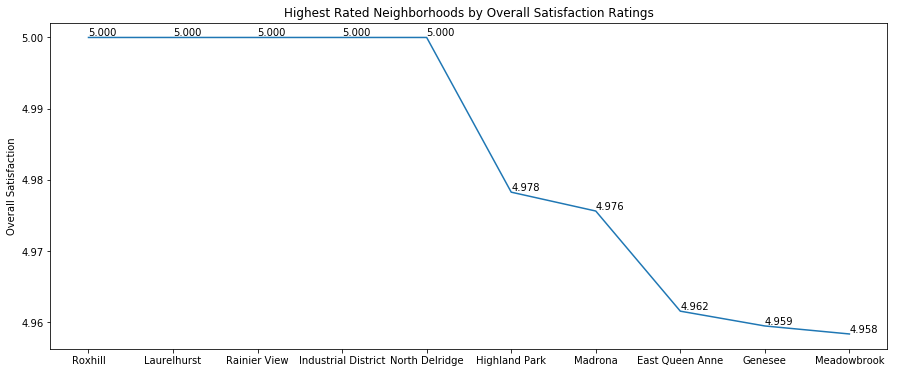

In [82]:
xn = list(top_neighborhoods["neighbourhood"])
yn = list(top_neighborhoods["overall_satisfaction"])
plt.figure(figsize=(15, 6)) 
plt.plot(xn,yn)
plt.title("Highest Rated Neighborhoods by Overall Satisfaction Ratings")
plt.ylabel("Overall Satisfaction")


for a,b in zip(xn,yn):

    label = "{:.3f}".format(b)

    plt.annotate(label, # this is the text
                 (a,b), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
    
#not useful to do a bar graph like this, maybe a line graph or

In [83]:
#thinking could make a plot with points of varyiong size to show and how many ratings they got too? idk how though